Index(['RIGHT_ACCELERATE', 'ACCELERATE', 'LEFT_ACCELERATE'], dtype='object')


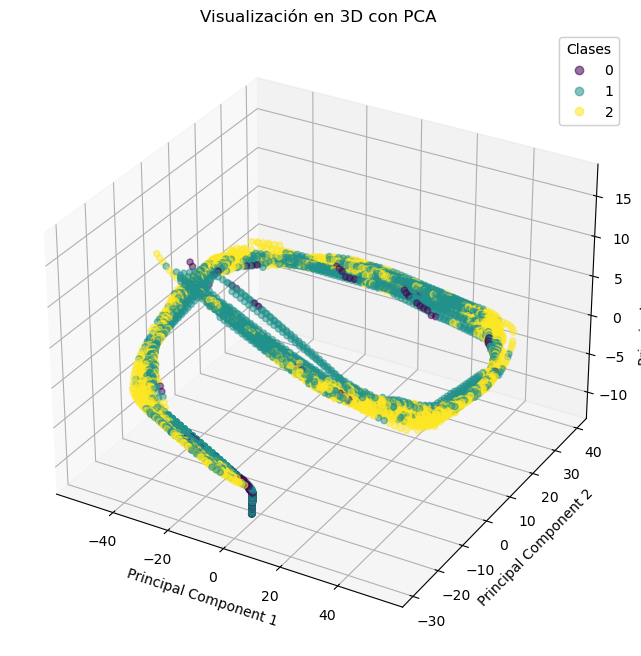

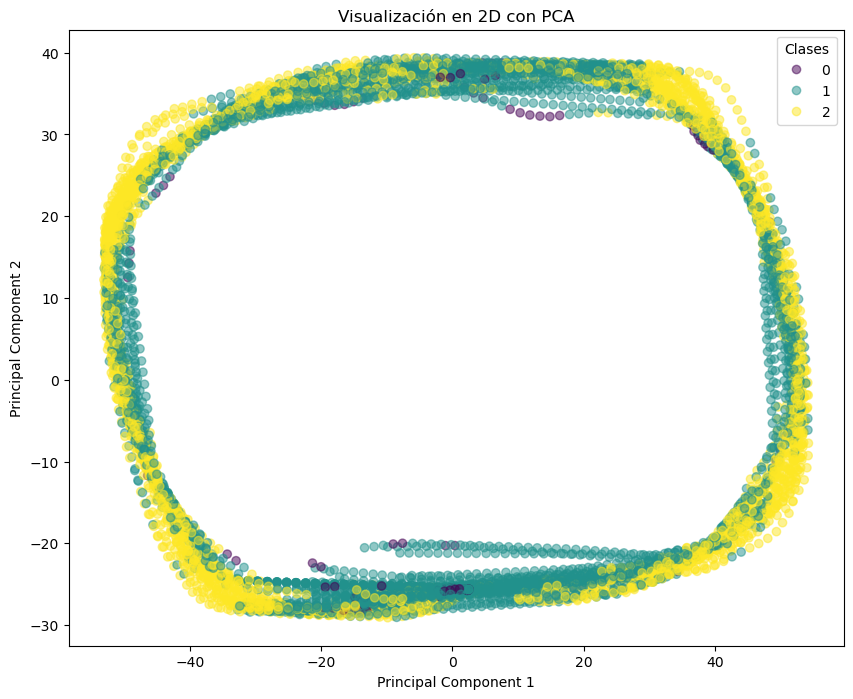

      ray1      ray2      ray3      ray4      ray5     kartx     karty  \
5     -1.0  6.520896  4.611063  6.489870  4.588938  15.98894  0.275746   
6     -1.0  6.520903  4.611065  6.489864  4.588936  15.98893  0.275745   
7     -1.0  6.520927  4.611078  6.489841  4.588923  15.98892  0.275744   
8     -1.0  6.520947  4.611091  6.489820  4.588911  15.98891  0.275744   
9     -1.0  6.520964  4.611101  6.489804  4.588900  15.98890  0.275744   
...    ...       ...       ...       ...       ...       ...       ...   
8360  -1.0  9.060004  4.012698  5.980088  5.808526  16.79746  0.279167   
8361  -1.0 -1.000000  4.591929  5.383984  5.228044  16.25503  0.279162   
8362  -1.0 -1.000000  5.220775  4.736440  4.597818  15.66033  0.279161   
8363  -1.0 -1.000000  5.769728  4.168035  4.007858  15.13119  0.279162   
8364  -1.0 -1.000000  6.087991  3.826627  3.502023  14.72427  0.279169   

          kartz       time            action  
5      3.105009   0.601405  RIGHT_ACCELERATE  
6      3.105014  

In [51]:
import pandas as pd
import glob
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

path = "dataset/raw/"

all_files = glob.glob(os.path.join(path , "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

#Excluir acciones en las que no se hace nada
df = df[df['action'] != 'NONE']

# Seleccionar todas las columnas como características
X = df.drop('action', axis=1)  # Excluir la columna 'action' si es la etiqueta/clase


# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


# Asignar colores numéricos a cada clase
class_colors, class_labels = pd.factorize(df['action'])

print(class_labels)

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Visualización en 3D con PCA')

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

plt.show()

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un gráfico bidimensional
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualización en 2D con PCA')

# Leyenda
plt.legend(*scatter.legend_elements(), title='Clases')

plt.show()

print(df)


print()
print()

# Normalizar
scaling = StandardScaler()
scaling.fit(X)
X = scaling.transform(X)

print(scaling.mean_)
print()
print(scaling.scale_)
print()

# Exportar, de nuevo con acciones
actions = df["action"].reset_index()
out = pd.DataFrame(X)
actions.reset_index()
out.reset_index()
out = pd.concat([out, actions], axis=1)
out = out.drop('index', axis=1)

print(out)
out.to_csv('dataset/normalized/kart.csv')